In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from covid import *

pd.set_option('display.max_rows', 50)

In [2]:
covid = Covid()
data = covid.getData()

data

,SNo,ObservationDate,Country,Last Update,Cases,DailyNewCases,Deaths,Recovered,Open,Closed,Population
0,36,01/22/2020,Japan,1/22/2020 17:00,2.0,2.0,0.0,0.0,2.0,0.0,126529100
1,74,01/23/2020,Japan,1/23/20 17:00,1.0,-1.0,0.0,0.0,1.0,0.0,126529100
2,120,01/24/2020,Japan,1/24/20 17:00,2.0,1.0,0.0,0.0,2.0,0.0,126529100
3,161,01/25/2020,Japan,1/25/20 17:00,2.0,0.0,0.0,0.0,2.0,0.0,126529100
4,207,01/26/2020,Japan,1/26/20 16:00,4.0,2.0,0.0,1.0,3.0,1.0,126529100
...,...,...,...,...,...,...,...,...,...,...,...
9532,16230,04/18/2020,Sao Tome and Principe,2020-04-18 22:40:18,4.0,0.0,0.0,0.0,4.0,0.0,211028
9533,16550,04/19/2020,Sao Tome and Principe,2020-04-19 23:49:05,4.0,0.0,0.0,0.0,4.0,0.0,211028
9534,16870,04/20/2020,Sao Tome and Principe,2020-04-20 23:44:50,4.0,0.0,0.0,0.0,4.0,0.0,211028
9535,17190,04/21/2020,Sao Tome and Principe,2020-04-21 23:39:09,4.0,0.0,0.0,0.0,4.0,0.0,211028


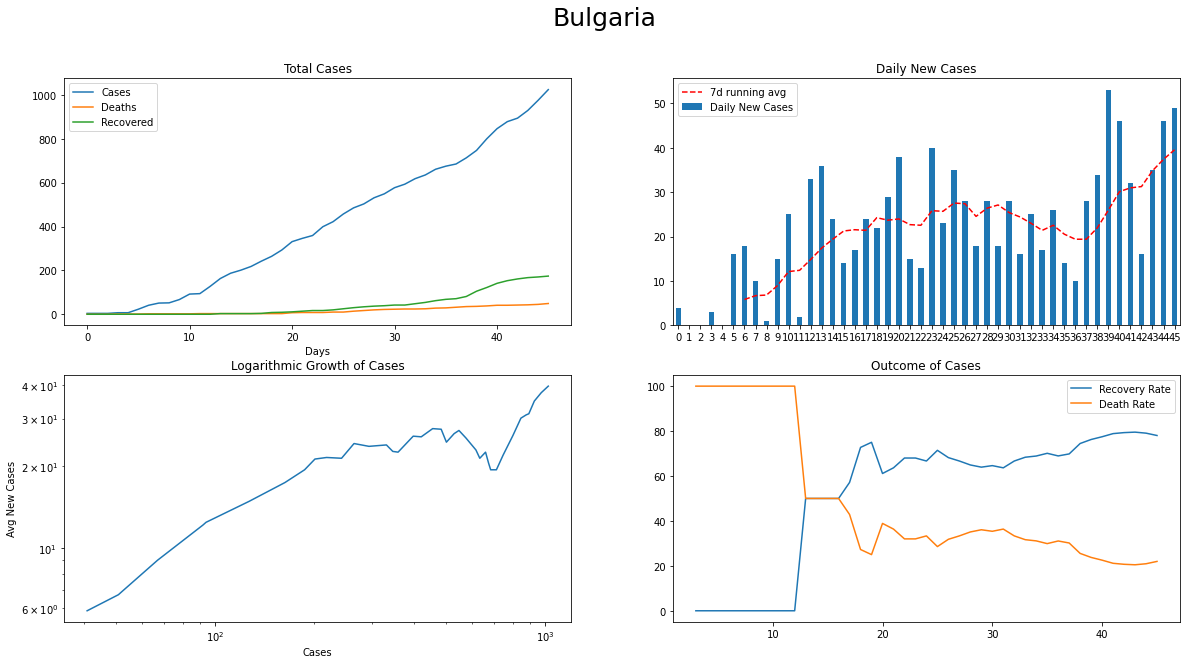

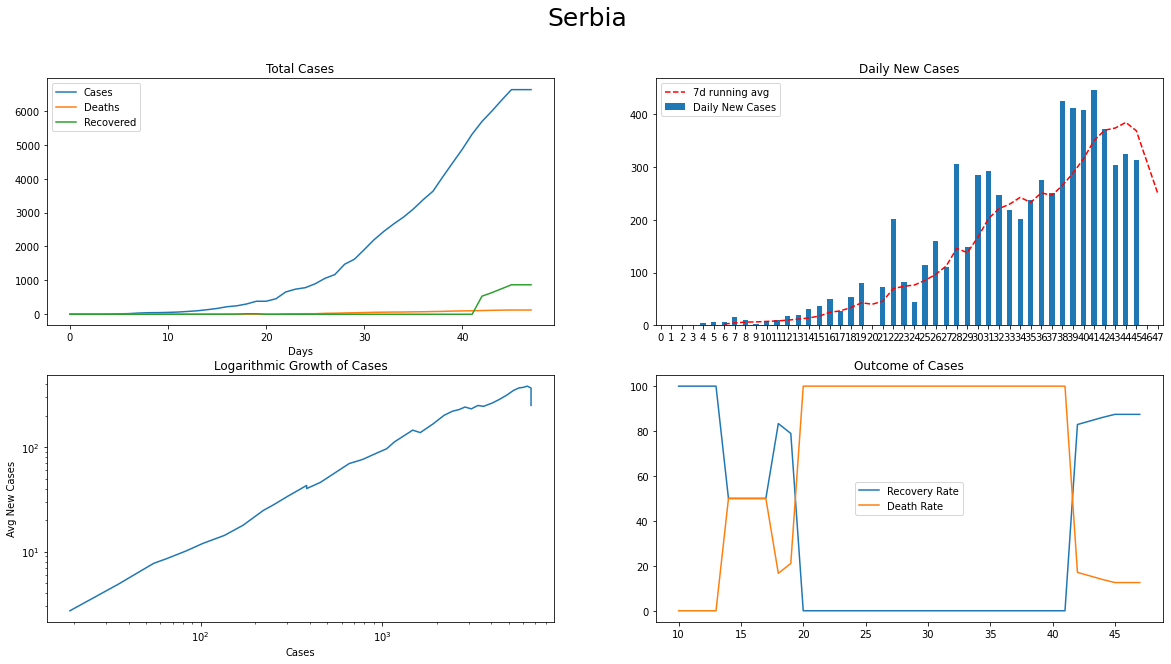

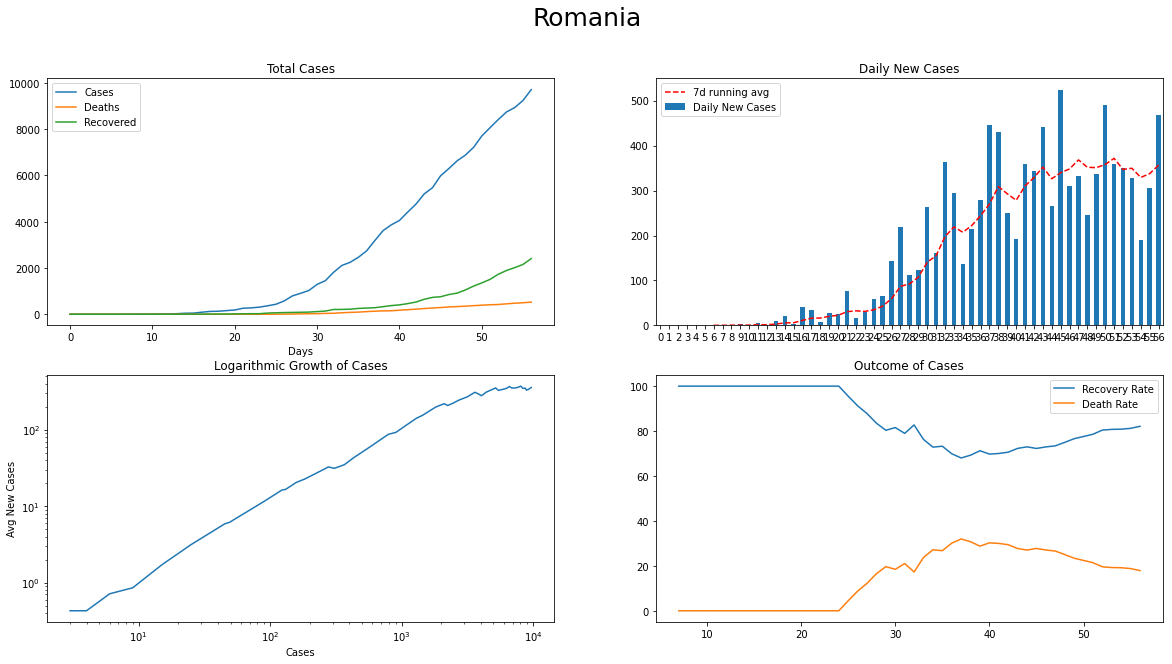

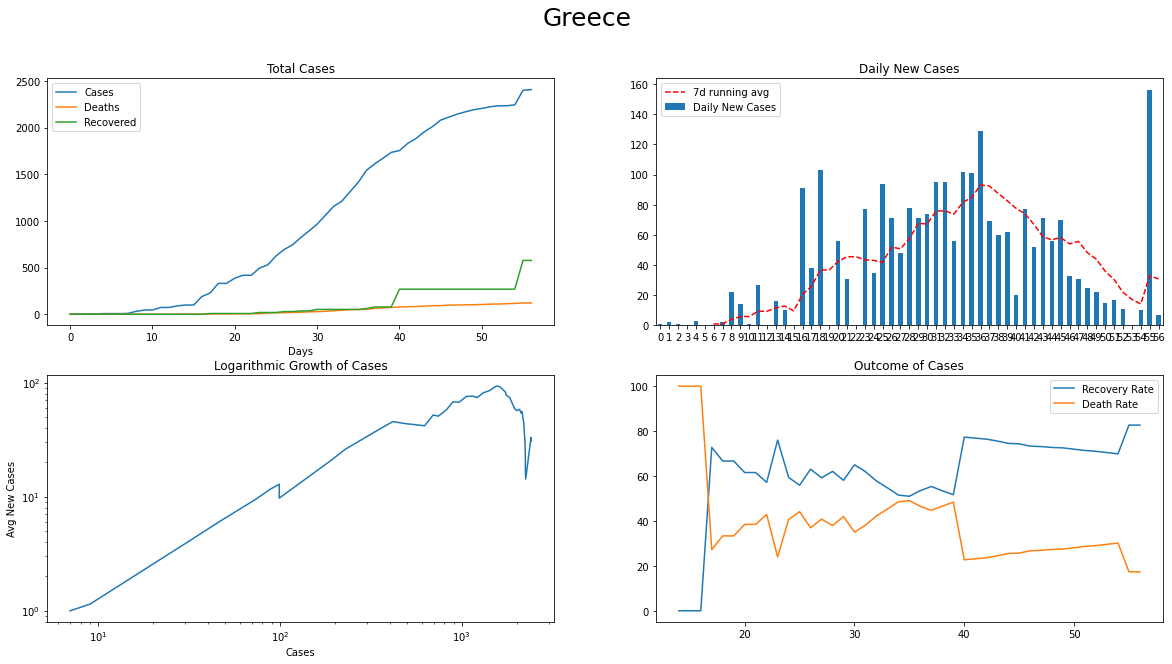

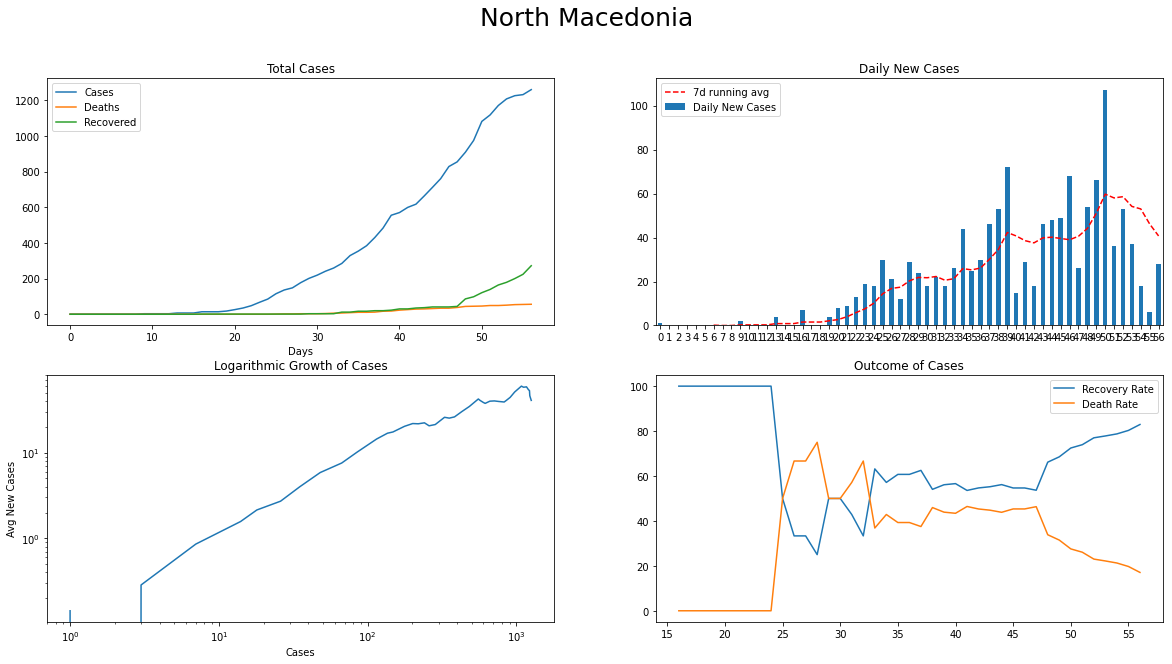

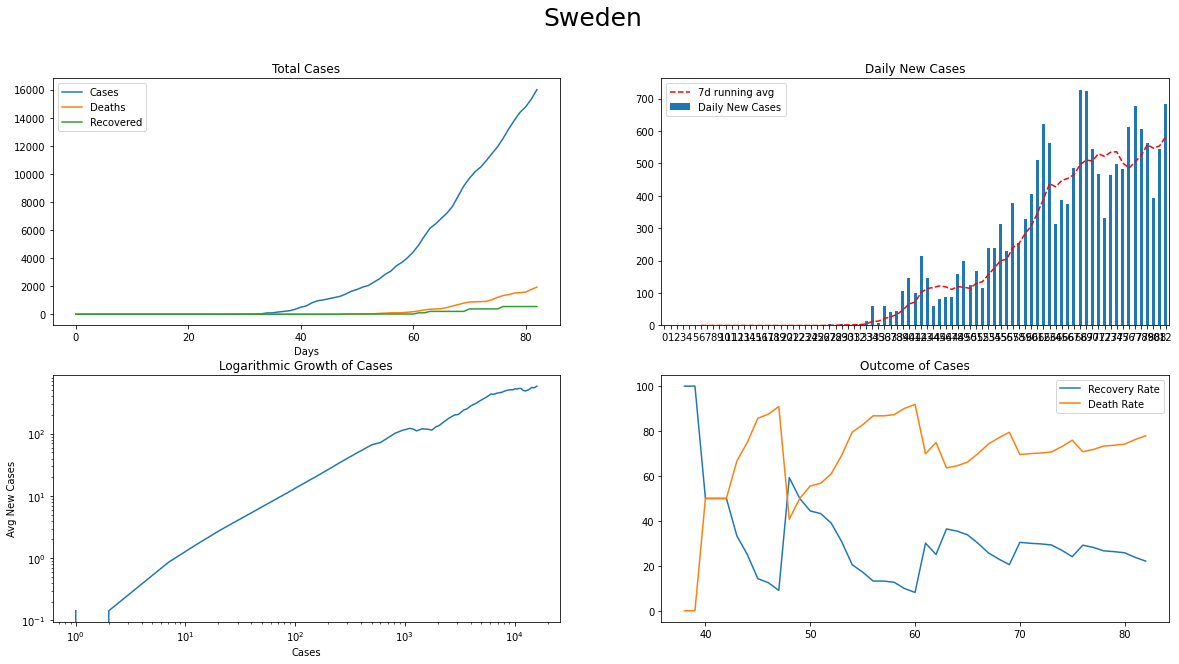

In [7]:
countries = ['Bulgaria', 'Serbia', 'Romania', 'Greece', 'North Macedonia', 'Sweden']
covid.plotCountriesStatus(countries)

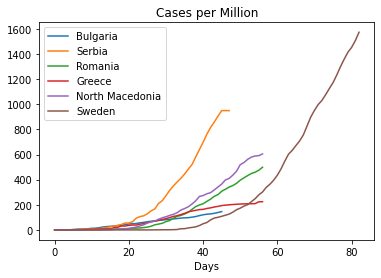

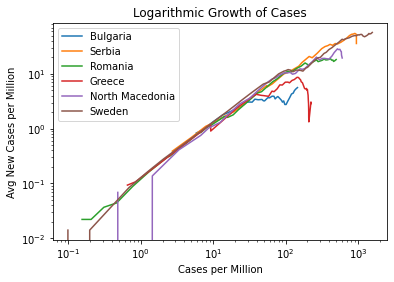

In [8]:
covid.plotAllInOne(covid.totalCases, countries, scale_by='Population', factor=1000000, title='Cases per Million', xlabel='Days')
covid.plotAllInOne(covid.growthOfCases, countries, scale_by='Population', factor=1000000, title='Logarithmic Growth of Cases', loglog=True, xlabel='Cases per Million', ylabel='Avg New Cases per Million')